In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
df = pd.read_csv('stocks.csv').dropna()
# data.columns = ['Date', 'Output']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df['Open']
df.head()

,Open
Date,
2012-01-03,59.970001
2012-01-04,60.209999
2012-01-05,59.349998
2012-01-06,59.419998
2012-01-09,59.029999


<Axes: xlabel='Date'>

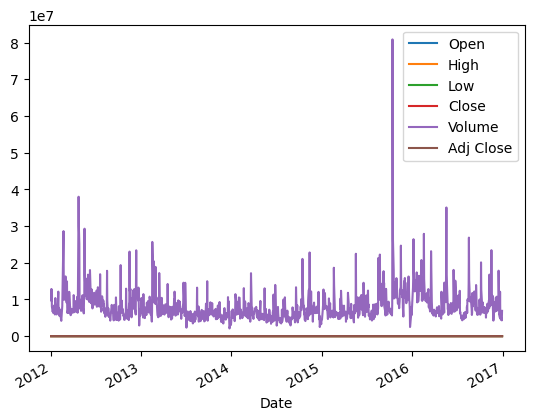

In [37]:
df.plot()

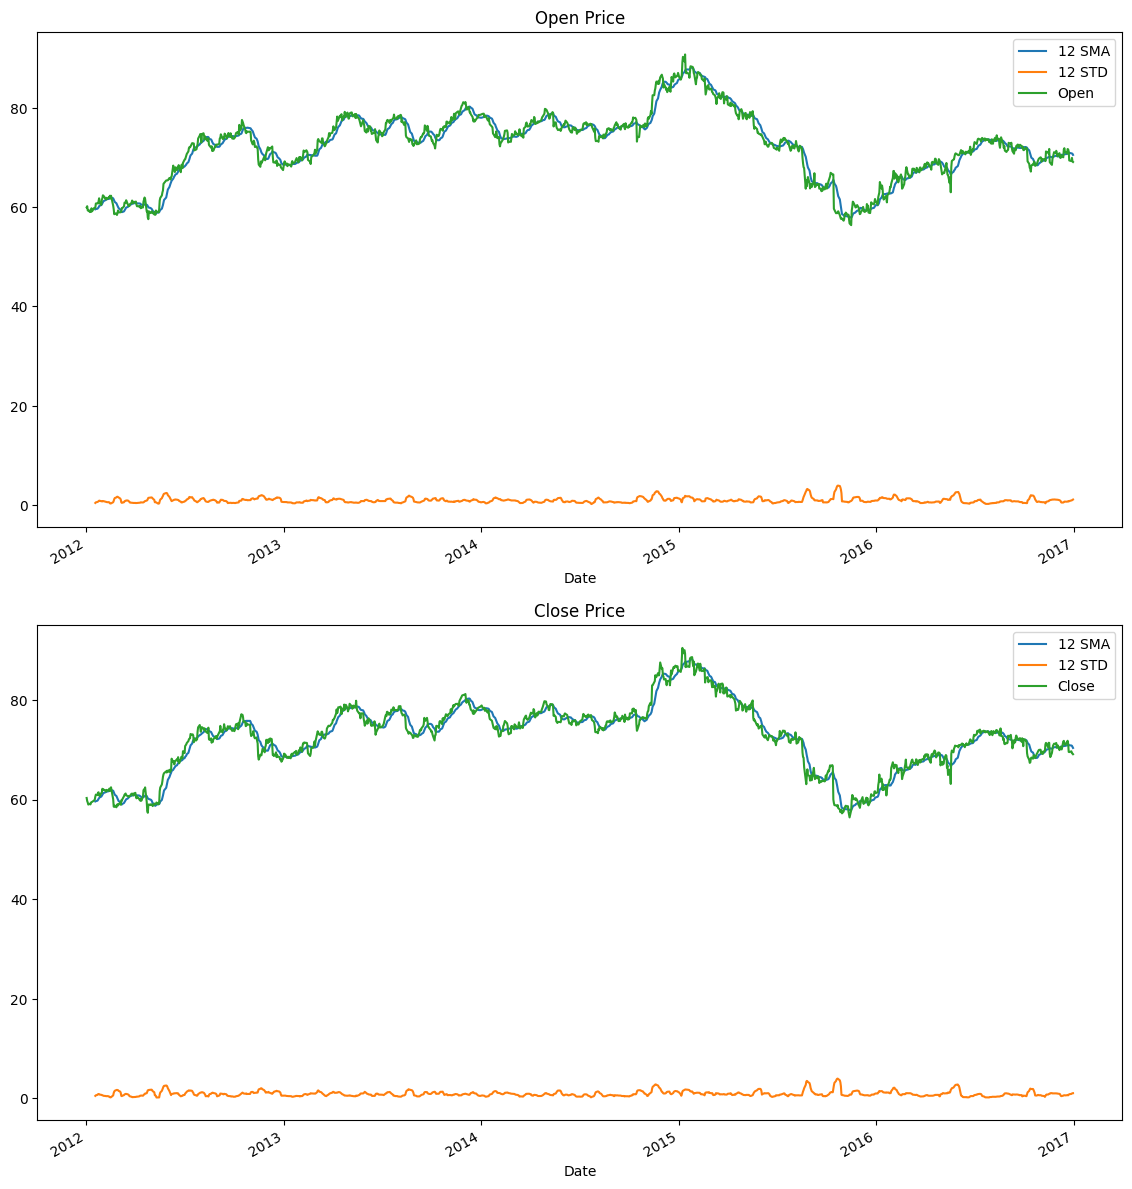

In [46]:
plt.figure(figsize=(14, 16))
plt.subplot(2, 1, 1)
df['Open'].rolling(12).mean().plot(label= '12 SMA', title= 'Open Price')
df['Open'].rolling(12).std().plot(label= '12 STD') 
df['Open'].plot()
plt.legend()


plt.subplot(2, 1, 2)
df['Close'].rolling(12).mean().plot(label= '12 SMA', title= 'Close Price')
df['Close'].rolling(12).std().plot(label= '12 STD') 
df['Close'].plot() 
plt.legend()


In [ ]:
df_season_compose = seasonal_decompose(df['Open'].dropna(), model='multiplicative')
# df_season_composes = seasonal_decompose(df['Open'].dropna(), model='additive')


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

Text(0.5, 1.0, 'Resid data')

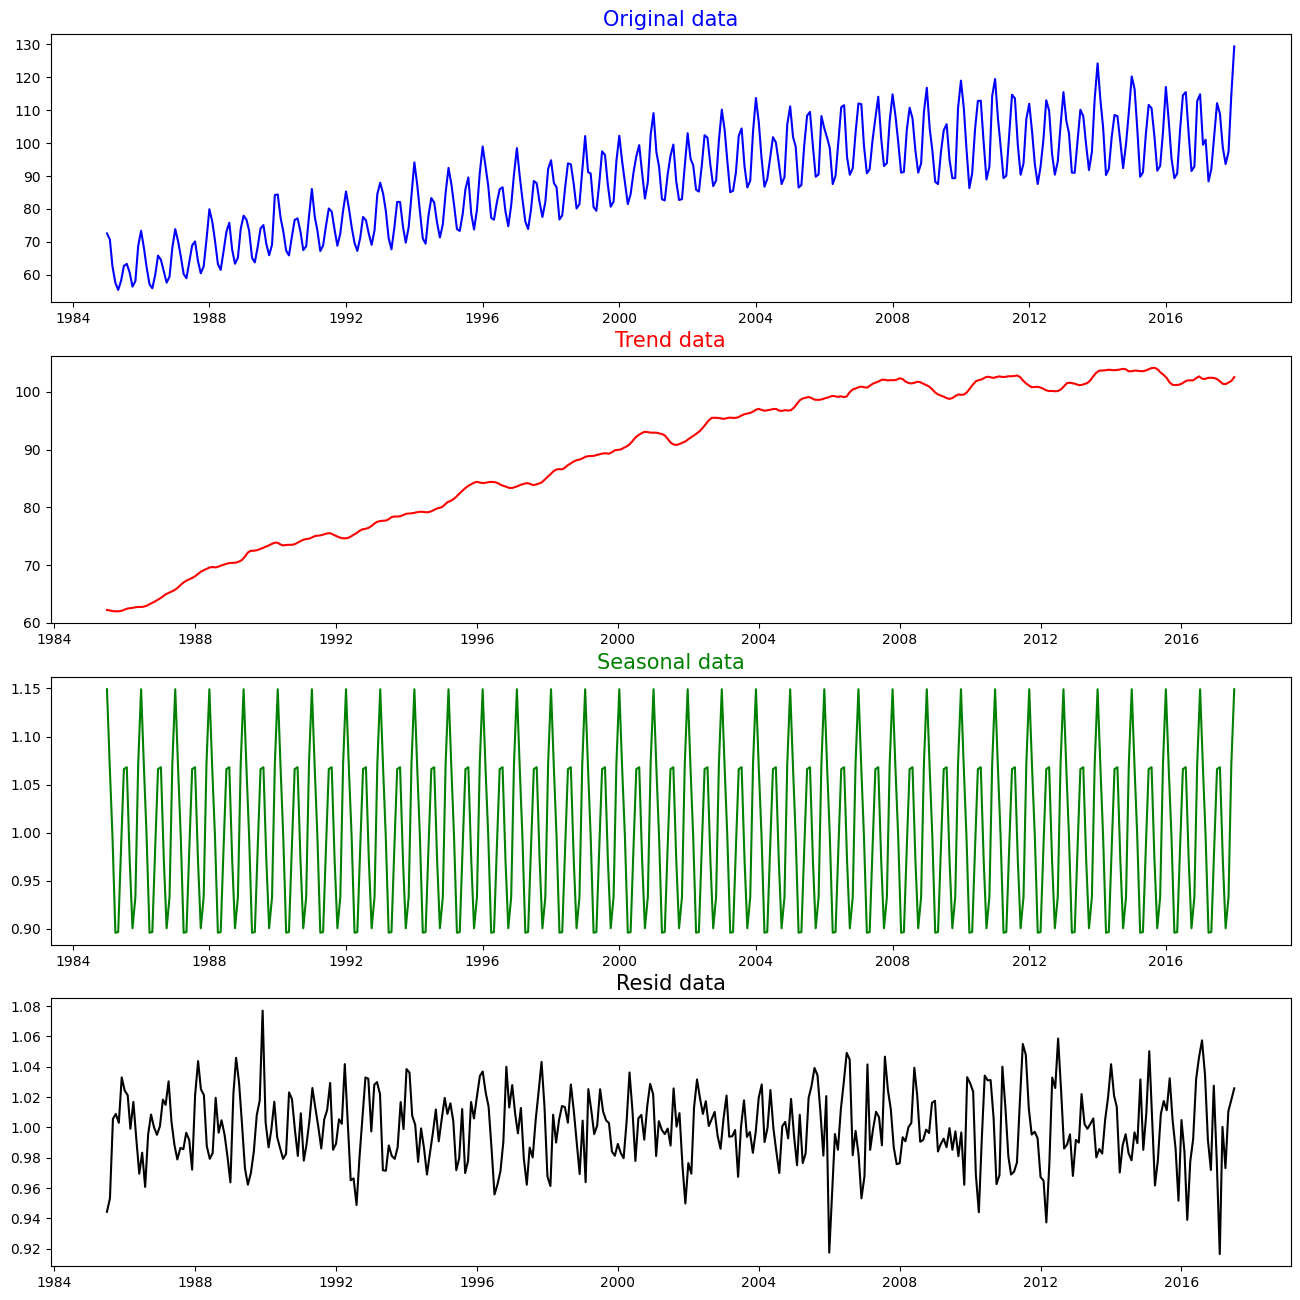

In [6]:
plt.figure(figsize=(16,16))

plt.subplot(4, 1, 1)
plt.plot(df['Output'], color='blue')
plt.title('Original data', color='blue', fontsize=15)

plt.subplot(4, 1, 2)
plt.plot(df_season_compose.trend, color = 'red')
plt.title('Trend data', color = 'red', fontsize = 15)

plt.subplot(4, 1, 3)
plt.plot(df_season_compose.seasonal, color='green')
plt.title('Seasonal data', color='green', fontsize = 15)

plt.subplot(4, 1, 4)
plt.plot(df_season_compose.resid, color='black')
plt.title('Resid data', color='black', fontsize = 15)

## Kiểm tra xem dữ liệu có dừng hay không

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
fuller_test = adfuller(df['Output'])
print(fuller_test)

(np.float64(-2.25699035004725), np.float64(0.18621469116586592), 15, 381, {'1%': np.float64(-3.4476305904172904), '5%': np.float64(-2.869155980820355), '10%': np.float64(-2.570827146203181)}, np.float64(1840.8474501627156))


In [9]:
def test_p_value(data):
    p_value = adfuller(data)[1]
    print('p_value: ', p_value)
    if p_value <= 0.05:
        print('Bác bỏ giả thuyết NULL, dữ liệu dừng')
    else:
        print('Không bác bỏ giả thuyết NULL, dữ liệu không dừng')
test_p_value(df['Output'])

p_value:  0.18621469116586592
Không bác bỏ giả thuyết NULL, dữ liệu không dừng


## Chuyển về dữ liệu dừng

p_value:  4.0777865655394095e-10
Bác bỏ giả thuyết NULL, dữ liệu dừng


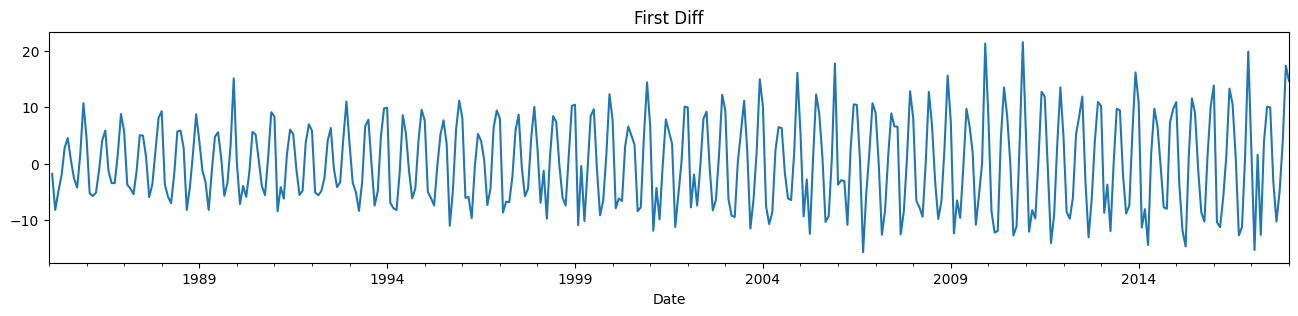

In [10]:
plt.figure(figsize=(16, 3))
df['First_diff'] = df['Output']-df['Output'].shift(1) #shif(1) là độ trượt 1 đơn vị để xét khi tính toán
df['First_diff'].plot(title='First Diff')
test_p_value(df['First_diff'].dropna())


p_value:  4.183693747998922e-17
Bác bỏ giả thuyết NULL, dữ liệu dừng


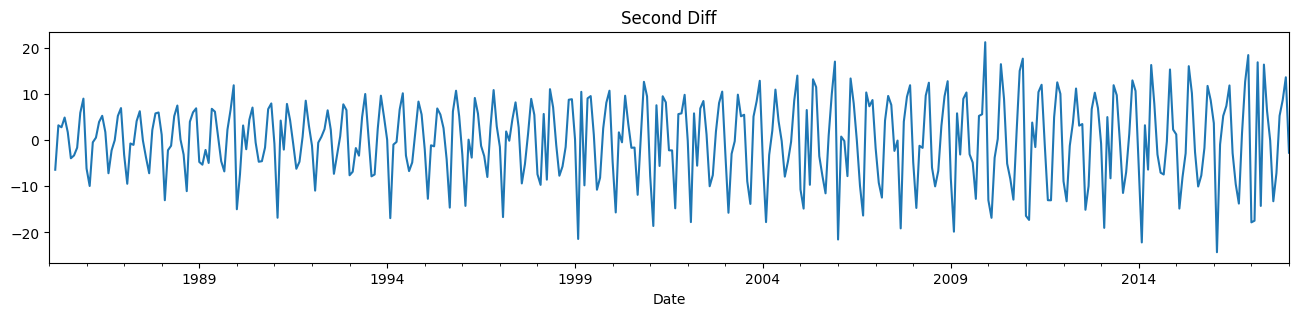

In [11]:
plt.figure(figsize=(16, 3))
df['Second_diff'] = df['First_diff'] - df['First_diff'].shift(1) 
df['Second_diff'].plot(title='Second Diff')
test_p_value(df['Second_diff'].dropna())

p_value:  8.812644938089282e-07
Bác bỏ giả thuyết NULL, dữ liệu dừng


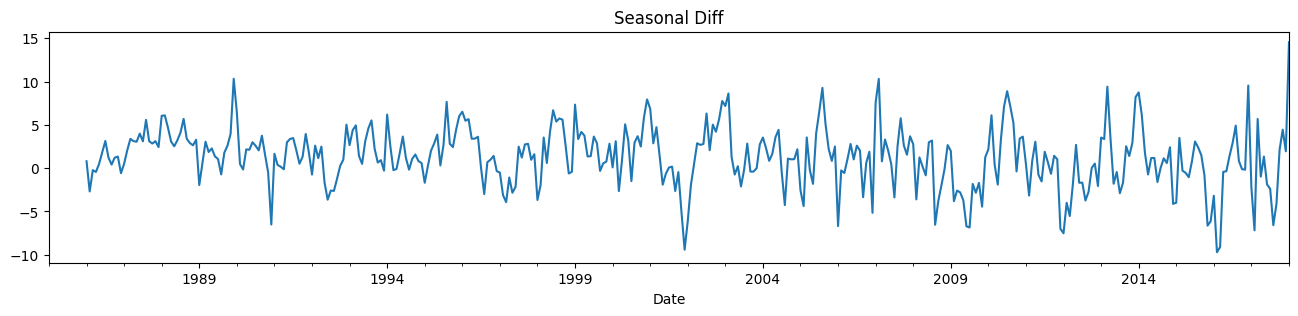

In [12]:
plt.figure(figsize=(16, 3))
df['Seasonal_diff'] = df['Output'] - df['Output'].shift(12) 
df['Seasonal_diff'].plot(title='Seasonal Diff')
test_p_value(df['Seasonal_diff'].dropna())

### Sau khi thực hiện phép tính chênh lệch đầu tiên thu được First_diff đã là chuỗi dừng
### Nên d=1 vì có sai phân là 1 được cho vào từ .shift(1)

## Vẽ đồ thị ACF và PACF


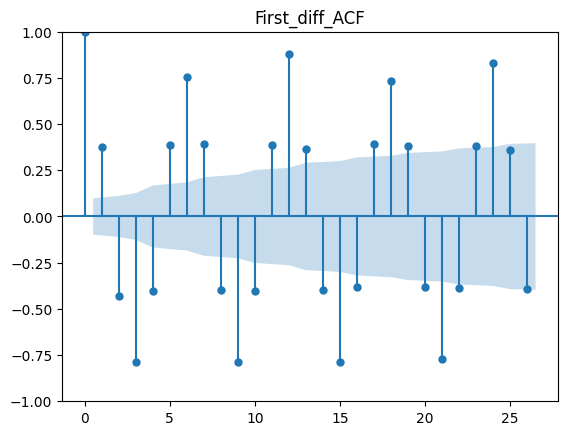

In [13]:
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf

first_diff_acf = plot_acf(df['First_diff'].dropna(), title='First_diff_ACF')


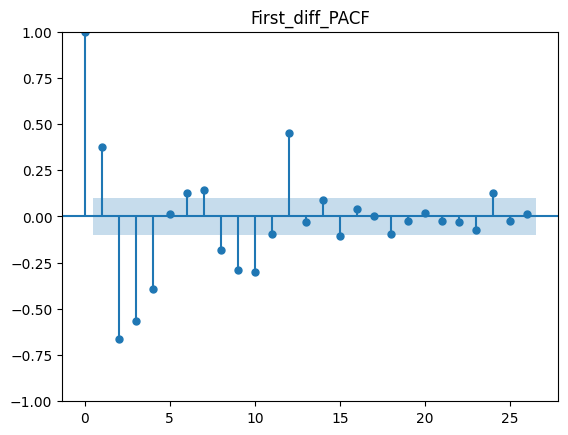

In [14]:
first_diff_pacf = plot_pacf(df['First_diff'].dropna(), title='First_diff_PACF')

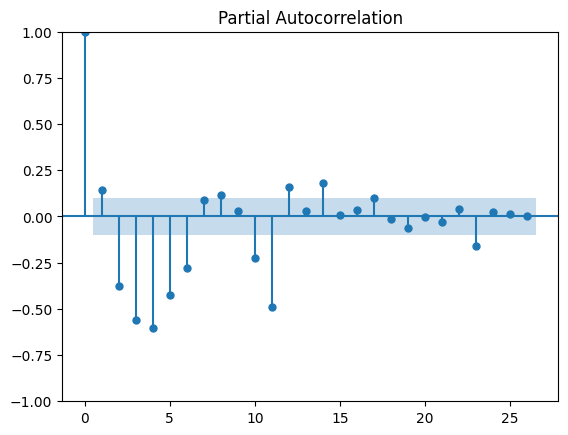

In [15]:
sec_diff = plot_pacf(df['Second_diff'].dropna())

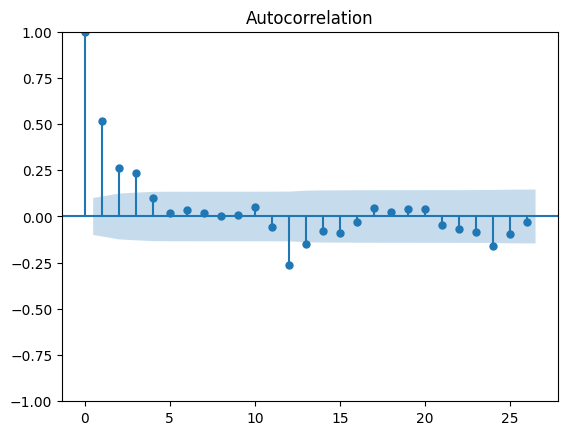

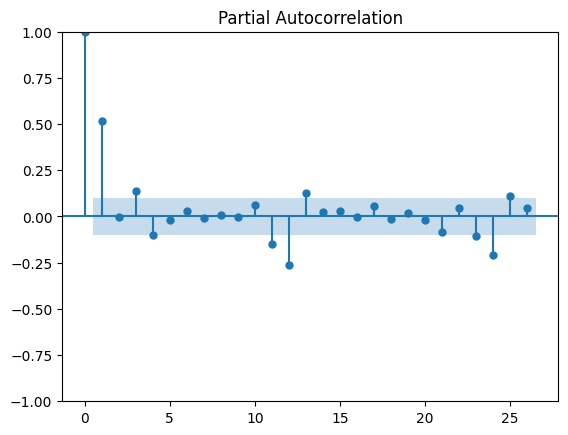

In [16]:
p1 = plot_acf(df['Seasonal_diff'].dropna()) 
p2 = plot_pacf(df['Seasonal_diff'].dropna())

### Dựa vào ACF để tìm p = 3, dựa vào PACF để tìm q = 2, ở bài này sử dụng df['First_diff']

## Xây dựng mô hình ARIMA

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
arima_model = ARIMA(df['Output'], order=(3, 1, 2))
results = arima_model.fit()
print(results.summary())

c:\Users\NguyenHuuNghia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\NguyenHuuNghia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\NguyenHuuNghia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Output   No. Observations:                  397
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1042.733
Date:                Thu, 23 Jan 2025   AIC                           2097.465
Time:                        07:33:28   BIC                           2121.354
Sample:                    01-01-1985   HQIC                          2106.929
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8569      0.045     18.870      0.000       0.768       0.946
ar.L2         -0.8563      0.045    -19.172      0.000      -0.944      -0.769
ar.L3         -0.1429      0.045     -3.174      0.0

c:\Users\NguyenHuuNghia\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

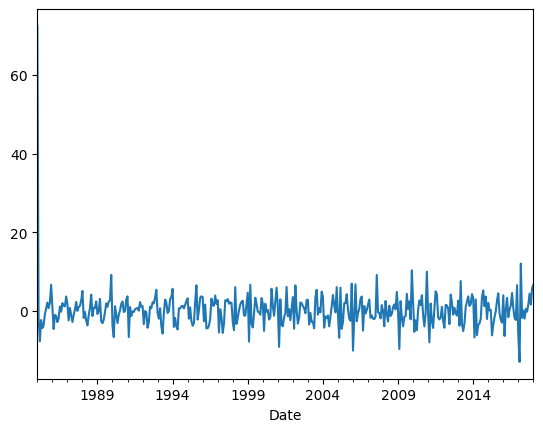

In [19]:
results.resid.plot()

<Axes: ylabel='Density'>

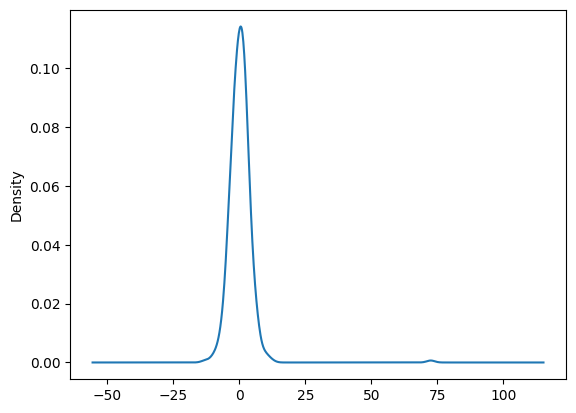

In [20]:
results.resid.plot(kind='kde')

<Axes: xlabel='Date'>

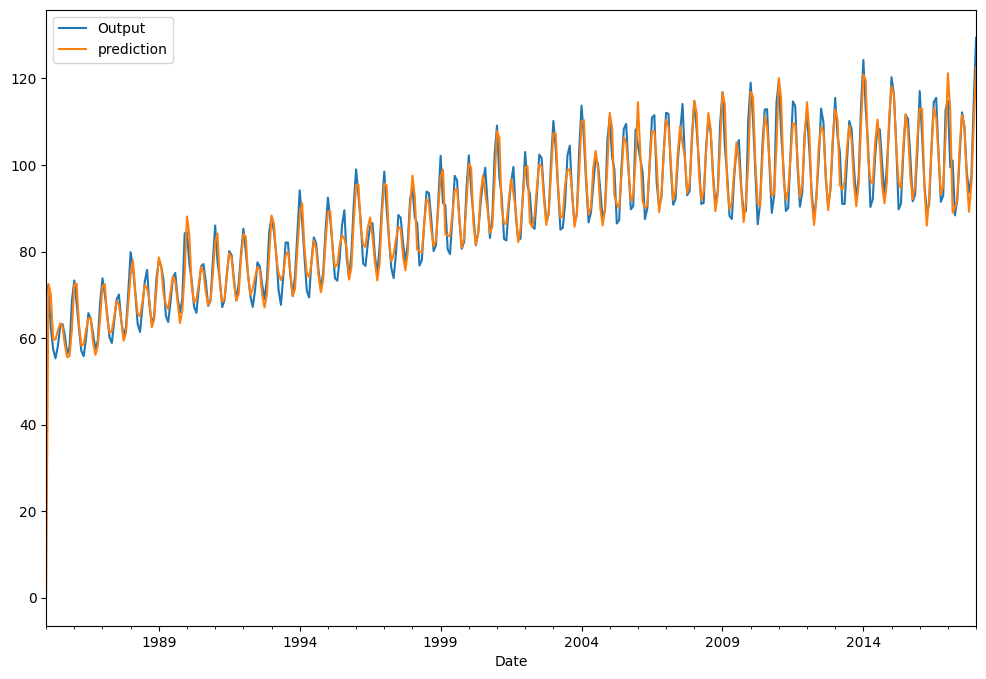

In [21]:
df['prediction'] = results.predict()
df[['Output','prediction']].plot(figsize=(12,8))

### Thêm vào dataset khoảng thời gian ở tương lai, cụ thể là từ 1/2018 đến 12/2019 với giá trị null ở từng thời điểm, và bắt đầu dự báo giá trị cho các giá trị ở từng thời điểm này.

In [22]:
from pandas.tseries.offsets import DateOffset
extra_dates = [df.index[-1] + DateOffset(months=m) for m in range (1,24)]
forecast_df = pd.DataFrame(index=extra_dates,columns=df.columns)
forecast_df.head()


,Output,First_diff,Second_diff,Seasonal_diff,prediction
2018-02-01,NaN,NaN,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN,NaN,NaN


In [23]:
final_df = pd.concat([df,forecast_df])

C:\Users\NguyenHuuNghia\AppData\Local\Temp\ipykernel_22396\3786105939.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([df,forecast_df])


Text(0.5, 1.0, 'Output in 2018-2019 ARIMA')

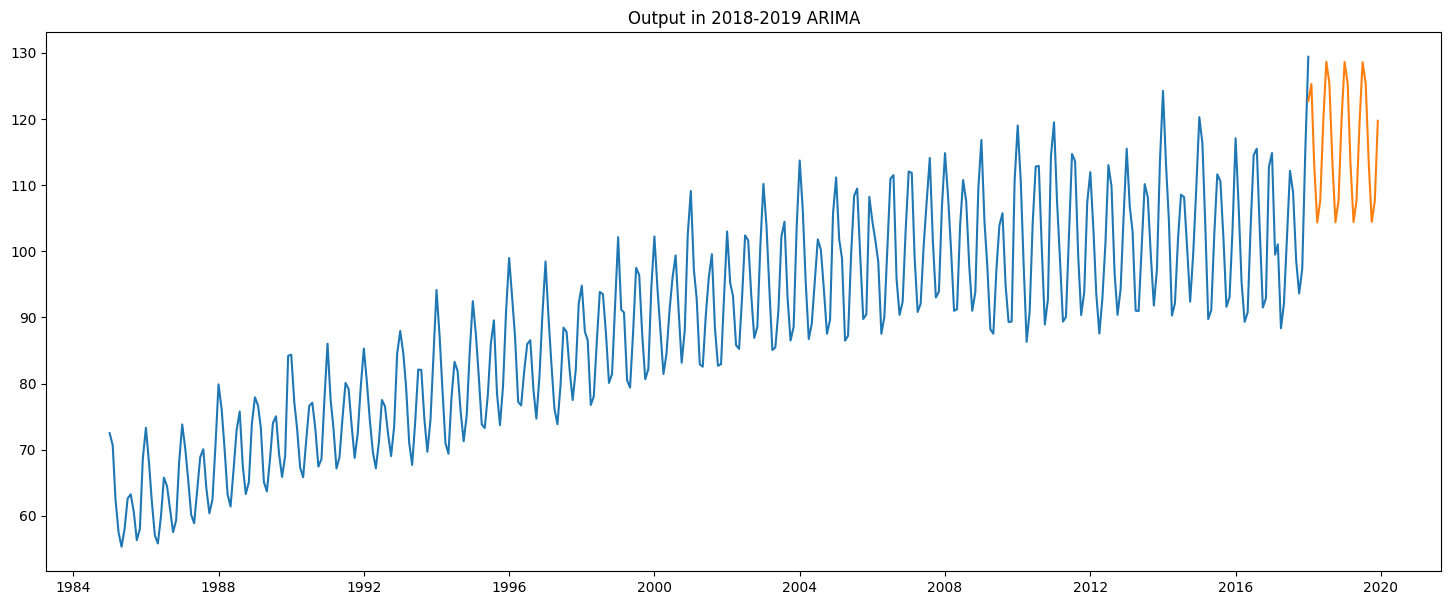

In [24]:
final_df['prediction'] = results.predict(start=396, end=420)
plt.figure(figsize=(18, 7))
plt.plot(final_df[['Output','prediction']])
plt.title("Output in 2018-2019 ARIMA")

# Sau khi sử dụng mô hình dự báo thì có thể thấy được kết quả dự báo là Output ở 2 năm tiếp theo là 2018 và 2019 giao động trong khoảng hơn 100 đến dưới 130. Và có chu kỳ lên xuống theo mỗi tháng.